In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=32

In [3]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475305, 32, 16)
strides:  (4096, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x2966f7a1040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475305,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x296e3852040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380244

In [9]:
training_sample

380244

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380244, 32, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380244,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380244, 32, 15) (380244, 1) (95061, 32, 15) (95061, 1)


In [20]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2]),activation='relu'),
    keras.layers.GRU(units=64,return_sequences=True,activation='relu'),
    keras.layers.GRU(units=32,activation='relu'),
    keras.layers.Dense(units=50,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='MeanSquaredError', optimizer='sgd',metrics=['AUC'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32, 128)           55680     
                                                                 
 gru_1 (GRU)                 (None, 32, 64)            37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 50)                1650      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 104,037
Trainable params: 104,037
Non-trainable params: 0
_________________________________________________________________


In [22]:
 start = t.time()

In [23]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/140
2971/2971 [==============================] - 593s 197ms/step - loss: 0.1928 - auc: 0.5007 - val_loss: 0.1861 - val_auc: 0.5177
Epoch 2/140
2971/2971 [==============================] - 564s 190ms/step - loss: 0.1927 - auc: 0.5173 - val_loss: 0.1860 - val_auc: 0.5001
Epoch 3/140
2971/2971 [==============================] - 559s 188ms/step - loss: 0.1926 - auc: 0.5337 - val_loss: 0.1860 - val_auc: 0.5140
Epoch 4/140
2971/2971 [==============================] - 556s 187ms/step - loss: 0.1925 - auc: 0.5520 - val_loss: 0.1860 - val_auc: 0.5410
Epoch 5/140
2971/2971 [==============================] - 559s 188ms/step - loss: 0.1924 - auc: 0.5658 - val_loss: 0.1859 - val_auc: 0.5990
Epoch 6/140
2971/2971 [==============================] - 561s 189ms/step - loss: 0.1923 - auc: 0.5829 - val_loss: 0.1858 - val_auc: 0.5816
Epoch 7/140
2971/2971 [==============================] - 559s 188ms/step - loss: 0.1921 - auc: 0.6062 - val_loss: 0.1855 - val_auc: 0.5991
Epoch 8/140
2971/2971 [====

2971/2971 [==============================] - 585s 197ms/step - loss: 0.1485 - auc: 0.8101 - val_loss: 0.1477 - val_auc: 0.8055
Epoch 60/140
2971/2971 [==============================] - 588s 198ms/step - loss: 0.1483 - auc: 0.8106 - val_loss: 0.1475 - val_auc: 0.8044
Epoch 61/140
2971/2971 [==============================] - 585s 197ms/step - loss: 0.1482 - auc: 0.8110 - val_loss: 0.1470 - val_auc: 0.8038
Epoch 62/140
2971/2971 [==============================] - 587s 198ms/step - loss: 0.1480 - auc: 0.8116 - val_loss: 0.1457 - val_auc: 0.8070
Epoch 63/140
2971/2971 [==============================] - 591s 199ms/step - loss: 0.1479 - auc: 0.8121 - val_loss: 0.1467 - val_auc: 0.8061
Epoch 64/140
2971/2971 [==============================] - 587s 198ms/step - loss: 0.1477 - auc: 0.8125 - val_loss: 0.1460 - val_auc: 0.8071
Epoch 65/140
2971/2971 [==============================] - 590s 199ms/step - loss: 0.1476 - auc: 0.8130 - val_loss: 0.1457 - val_auc: 0.8073
Epoch 66/140
2971/2971 [=========

2971/2971 [==============================] - 609s 205ms/step - loss: 0.1433 - auc: 0.8263 - val_loss: 0.1434 - val_auc: 0.8169
Epoch 118/140
2971/2971 [==============================] - 605s 204ms/step - loss: 0.1433 - auc: 0.8264 - val_loss: 0.1498 - val_auc: 0.8124
Epoch 119/140
2971/2971 [==============================] - 605s 204ms/step - loss: 0.1432 - auc: 0.8267 - val_loss: 0.1434 - val_auc: 0.8170
Epoch 120/140
2971/2971 [==============================] - 606s 204ms/step - loss: 0.1432 - auc: 0.8267 - val_loss: 0.1497 - val_auc: 0.8162
Epoch 121/140
2971/2971 [==============================] - 609s 205ms/step - loss: 0.1431 - auc: 0.8270 - val_loss: 0.1454 - val_auc: 0.8163
Epoch 122/140
2971/2971 [==============================] - 607s 204ms/step - loss: 0.1430 - auc: 0.8271 - val_loss: 0.1436 - val_auc: 0.8158
Epoch 123/140
2971/2971 [==============================] - 611s 206ms/step - loss: 0.1431 - auc: 0.8271 - val_loss: 0.1434 - val_auc: 0.8178
Epoch 124/140
2971/2971 [==

In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 91s 30ms/step


In [25]:
stop=t.time()-start
print(stop)

82442.29831385612


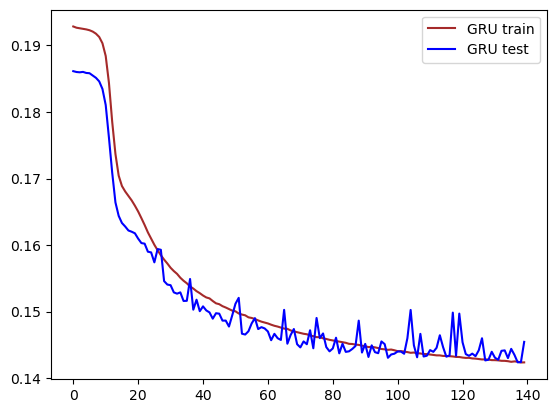

In [26]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [27]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [28]:
np.shape(pred_y)

(95061, 1)

In [29]:
pred_y

array([[0.00444222],
       [0.00571438],
       [0.00450718],
       ...,
       [0.07637816],
       [0.07548021],
       [0.07604635]], dtype=float32)

In [43]:
pred_y=np.reshape(pred_y,95061)

0.14544991232936805
0.2178823425829336
0.38137896157151624
0.29455520738916263


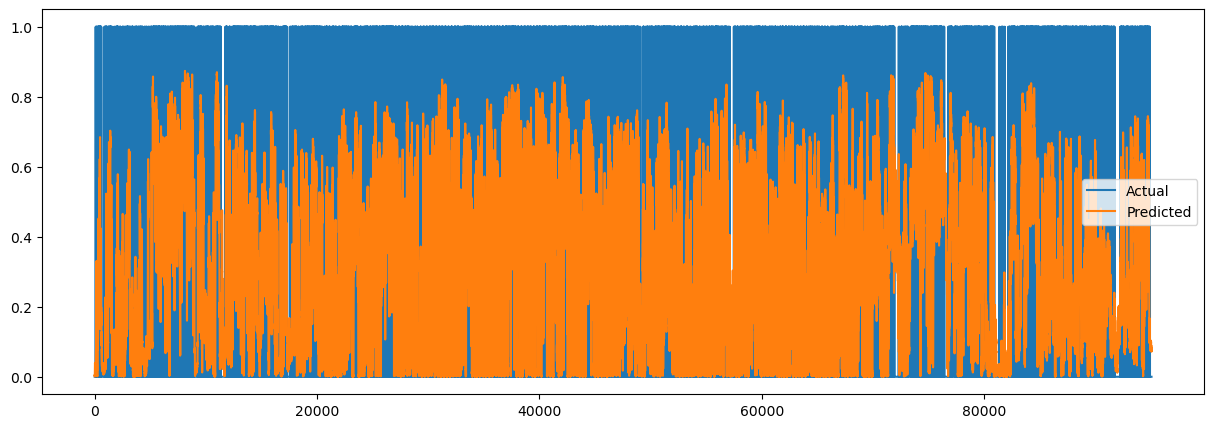

In [44]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [45]:
np.shape(train_X)

(380244, 32, 15)

In [46]:
np.shape(train_y)

(380244, 1)

In [47]:
np.shape(test_X)

(95061, 32, 15)

In [48]:
np.shape(test_y)

(95061, 1)

14854/14854 [==============================] - 541s 36ms/step


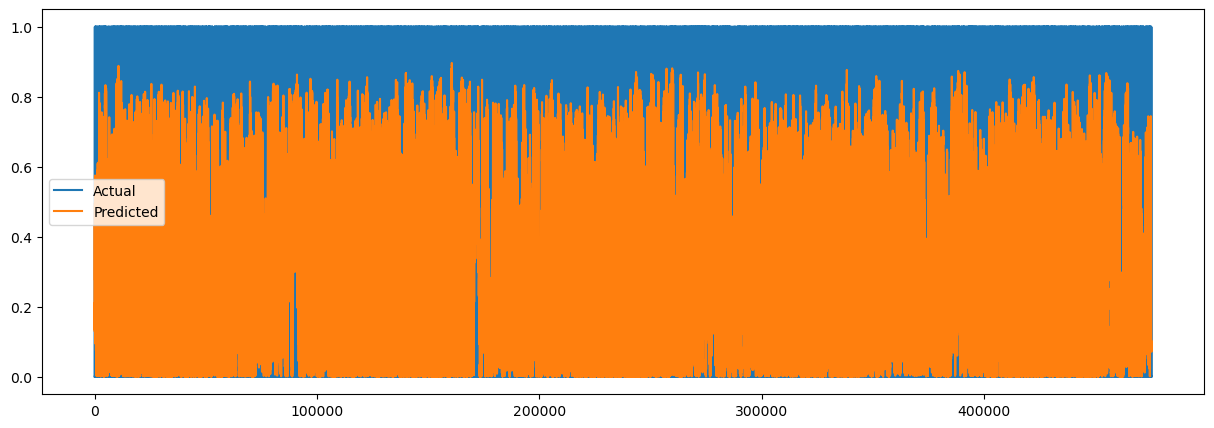

In [49]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

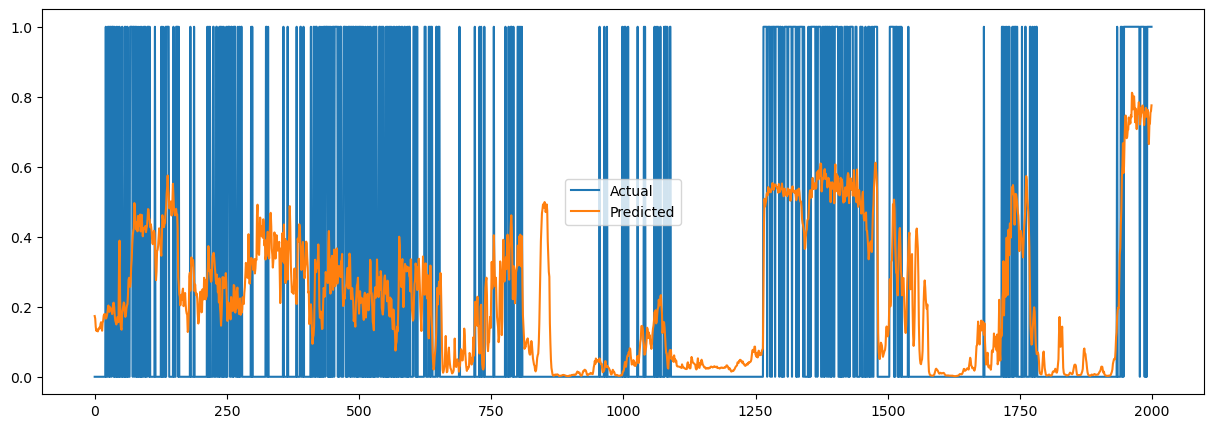

In [50]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [51]:
print(sum(tes)/len(tes))

[0.25795437]


In [52]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.5803195]
[0.84191976]
total acc [0.78004229]


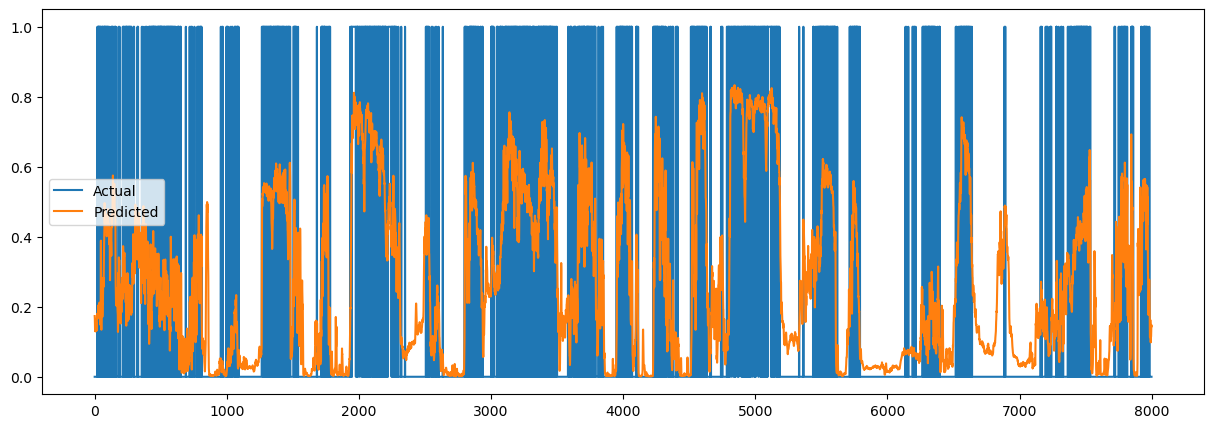

In [53]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

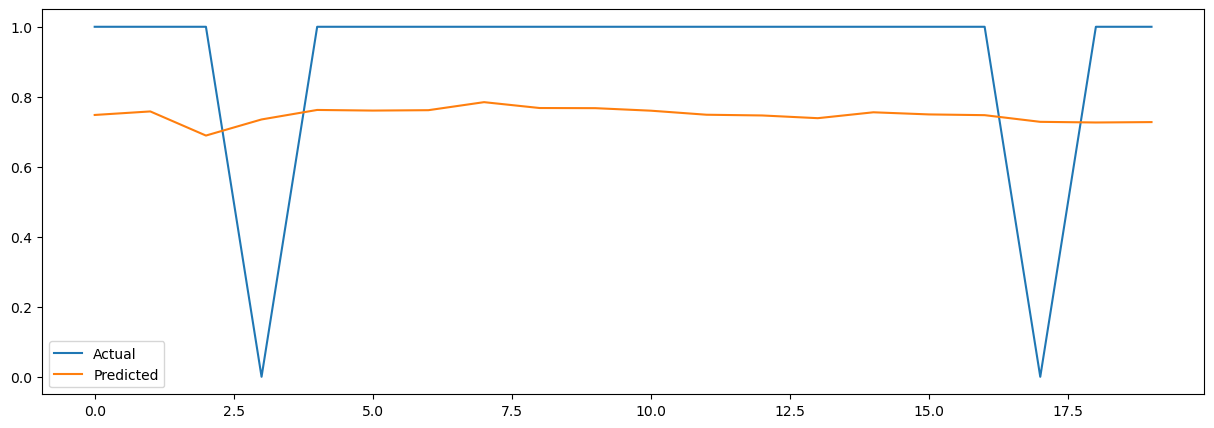

In [54]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

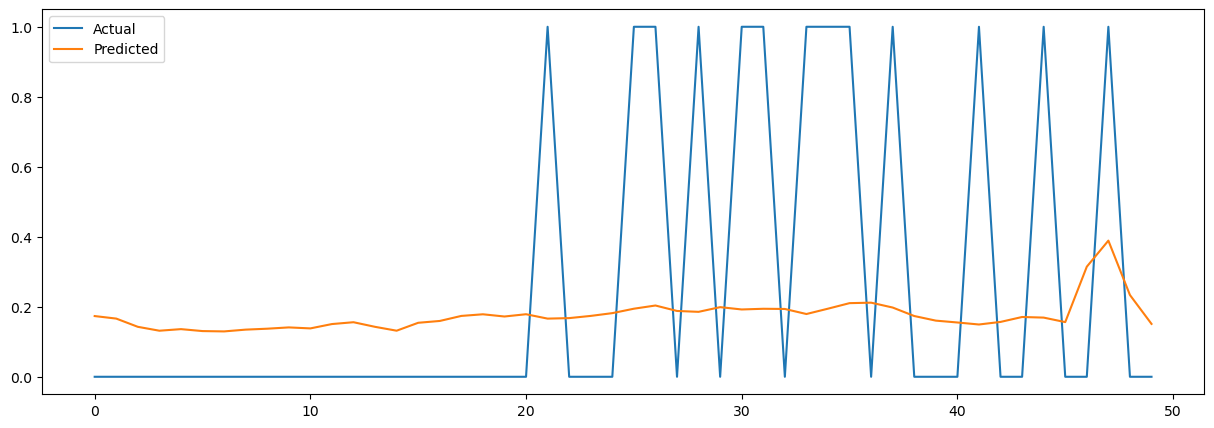

In [55]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

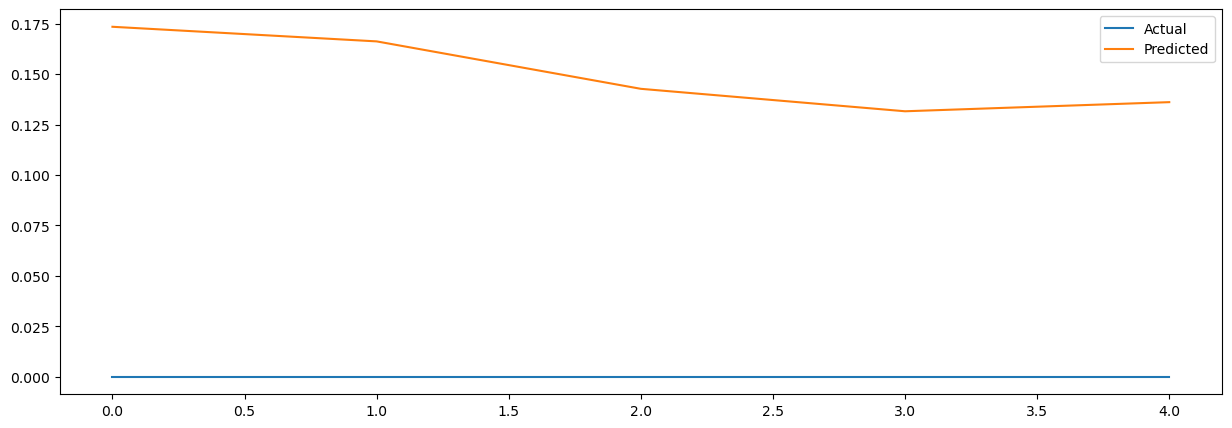

In [56]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()